## Importing required libraries.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

## Reading our input data for House Price Prediction.

In [19]:
customers = pd.read_csv('houseprice.csv')
customers.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674 Laurabury, NE 37010..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079 Lake Kathleen, CA ..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue Danieltown, WI 06482-..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett FPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond FPO AE 09386


## Describing our data.


In [20]:
customers.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02
mean,67466.903996,6.006579,6.855215,3.979706,35973.324719,1.196660e+06
std,11125.255850,1.025145,0.986642,1.203038,9162.128530,3.587926e+05
min,17796.631190,4.010907,4.242191,2.020000,16810.783310,2.018981e+05
25%,60854.040933,5.345444,6.294644,3.185000,29298.469055,1.020265e+06
50%,66450.090920,5.935536,6.954229,4.030000,35917.734705,1.175382e+06
75%,74499.831805,6.626426,7.436778,4.417500,40433.791930,1.440943e+06
max,95450.293090,8.562611,9.289854,6.410000,60828.249090,2.146925e+06


## Analyzing information from our data.

In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
Avg. Area Income                102 non-null float64
Avg. Area House Age             102 non-null float64
Avg. Area Number of Rooms       102 non-null float64
Avg. Area Number of Bedrooms    102 non-null float64
Area Population                 102 non-null float64
Price                           102 non-null float64
Address                         102 non-null object
dtypes: float64(6), object(1)
memory usage: 5.7+ KB


## Plots to visualize data of House Price Prediction.


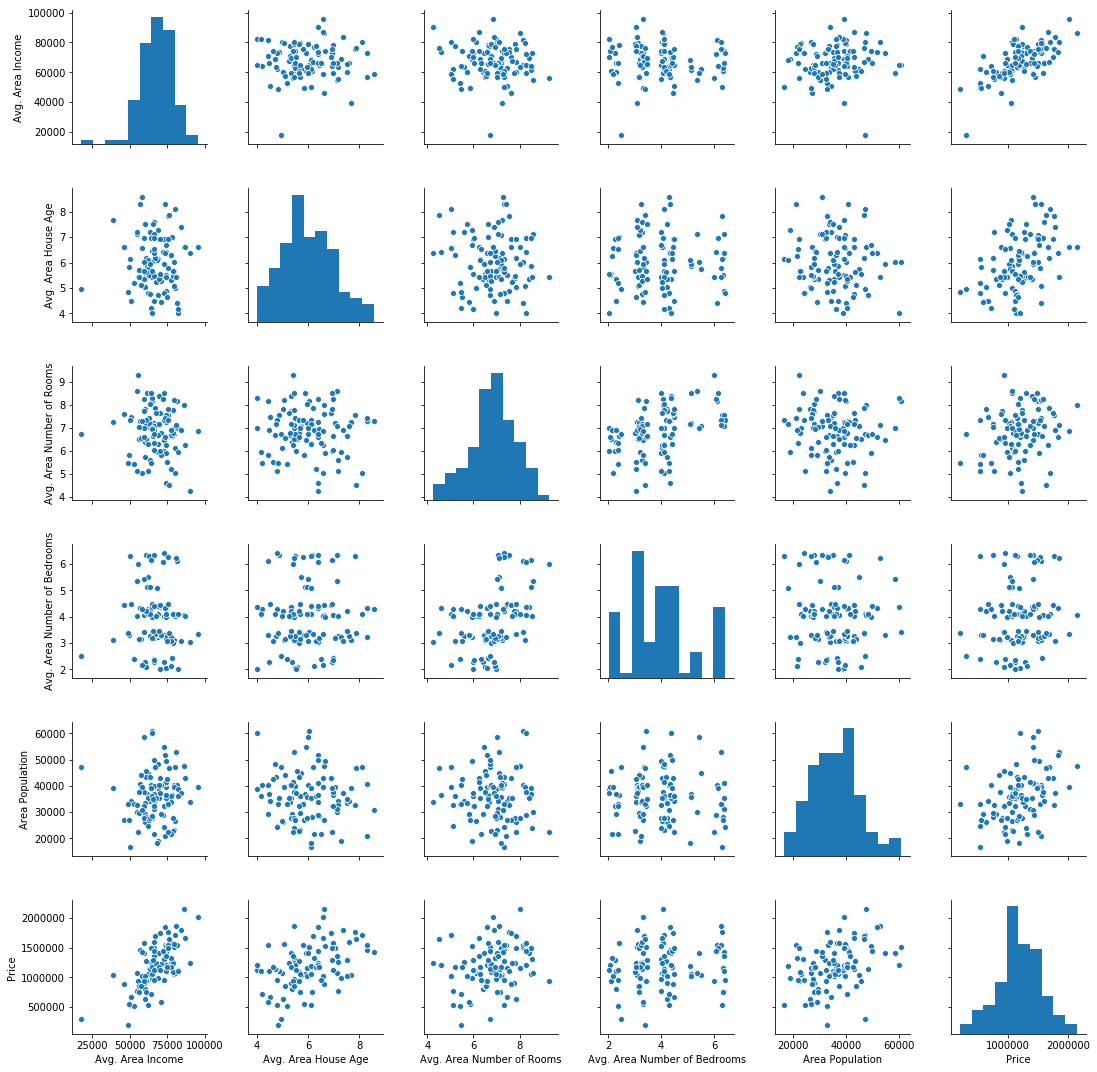

In [22]:
sns.pairplot(customers)

## Scaling our data.

In [23]:
scaler = StandardScaler()

X=customers.drop(['Price','Address'],axis=1)
y=customers['Price']

cols = X.columns

X = scaler.fit_transform(X)

## Splitting our data for training and test purposes.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training our Linear Regression model for House Price Prediction.

In [25]:
lr = LinearRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

r2_score(y_test,pred)

0.8164465503851437

##  Let’s visualize our predictions of House Price Prediction

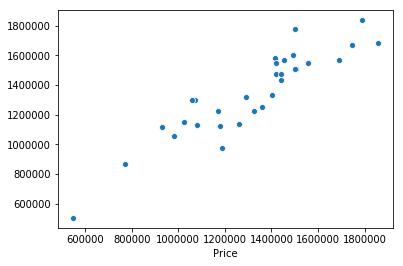

In [26]:
sns.scatterplot(x=y_test, y=pred)

## Plotting the residuals of our House Price Prediction model.

AttributeError: Unknown property kde

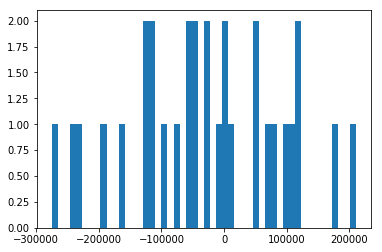

In [27]:
plt.hist((y_test-pred),bins=50,kde=True)

## Observe the coefficients.

In [28]:
cdf=pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients',ascending=False)
cdf

,coefficients
Avg. Area Income,224852.769460
Avg. Area House Age,191943.798040
Area Population,159633.828629
Avg. Area Number of Rooms,140401.692333
Avg. Area Number of Bedrooms,-8690.942679
